In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [77]:
iris_dataset = pd.read_csv("iris.csv")

In [78]:
# 1. Following the shared code with you for KNN on the Iris dataset, use 5-fold Cross-Validation, 
# and print the accuracy of each one. Then, take the average on them to report the overall accuracy.

In [79]:
# split dataset
X = iris_dataset.iloc[:, 0:3]  # Features
y = iris_dataset.iloc[:, 4]    # Target variable

In [80]:
# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier()

# 5-fold Cross-Validation
kf = KFold(n_splits=5, random_state=0, shuffle=True)

# Perform cross-validation and get accuracy for each fold
accuracies = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')

In [81]:
# Print the accuracy of each fold
for fold, accuracy in enumerate(accuracies, start=1):
    print(f'Fold {fold} accuracy: {accuracy}')

Fold 1 accuracy: 0.9666666666666667
Fold 2 accuracy: 0.8666666666666667
Fold 3 accuracy: 0.9333333333333333
Fold 4 accuracy: 0.9333333333333333
Fold 5 accuracy: 0.9


In [82]:
# Calculate the average accuracy across all folds
average_accuracy = accuracies.mean()
print(f'Average Accuracy: {average_accuracy}')

Average Accuracy: 0.9200000000000002


In [83]:
# 2. Following the previously shared code with you for KNN on the diabetes dataset, 
# find the best value less than 20 for KNN using cross-validation on parameter K
# (you may use a simple loop, report the accuracy of each parameter, and then choose the best parameter.
# Also, you should plot it in a two-dimensional space, showing the K values on the horizontal axis
# the relevant accuracy on the vertical axis)

In [84]:
diabetes_dataset = pd.read_csv("diabetes.csv")

In [85]:
# split dataset

X = diabetes_dataset.iloc[:, 0:7]

y = diabetes_dataset.iloc[:, 8]

In [86]:
# Define the range of k values (less than 20)
k_values = range(1, 20)
best_accuracy_of_each_k = []

In [87]:
# Perform cross-validation for each k
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation
    print(f'K={k}, Accuracy = {scores}, Best accuracy = {scores.max()} in fold {scores.argmax()+1}')
    best_accuracy_of_each_k.append(scores.max())

K=1, Accuracy = [0.65584416 0.63636364 0.65584416 0.74509804 0.62091503], Best accuracy = 0.7450980392156863 in fold 4
K=2, Accuracy = [0.68181818 0.72727273 0.68181818 0.74509804 0.67973856], Best accuracy = 0.7450980392156863 in fold 4
K=3, Accuracy = [0.68831169 0.66233766 0.7012987  0.77124183 0.65359477], Best accuracy = 0.7712418300653595 in fold 4
K=4, Accuracy = [0.69480519 0.7012987  0.74025974 0.73202614 0.69934641], Best accuracy = 0.7402597402597403 in fold 3
K=5, Accuracy = [0.70779221 0.66233766 0.70779221 0.75816993 0.67973856], Best accuracy = 0.7581699346405228 in fold 4
K=6, Accuracy = [0.72077922 0.68181818 0.7012987  0.75163399 0.67320261], Best accuracy = 0.7516339869281046 in fold 4


K=7, Accuracy = [0.74675325 0.7012987  0.71428571 0.75163399 0.66666667], Best accuracy = 0.7516339869281046 in fold 4
K=8, Accuracy = [0.74675325 0.70779221 0.74025974 0.77777778 0.69934641], Best accuracy = 0.7777777777777778 in fold 4
K=9, Accuracy = [0.73376623 0.72077922 0.72077922 0.77124183 0.67973856], Best accuracy = 0.7712418300653595 in fold 4
K=10, Accuracy = [0.75324675 0.74675325 0.72727273 0.80392157 0.69281046], Best accuracy = 0.803921568627451 in fold 4
K=11, Accuracy = [0.74025974 0.73376623 0.72727273 0.79084967 0.67973856], Best accuracy = 0.7908496732026143 in fold 4
K=12, Accuracy = [0.74675325 0.74675325 0.72727273 0.77777778 0.69934641], Best accuracy = 0.7777777777777778 in fold 4
K=13, Accuracy = [0.75324675 0.72077922 0.74025974 0.80392157 0.68627451], Best accuracy = 0.803921568627451 in fold 4
K=14, Accuracy = [0.75324675 0.74675325 0.74025974 0.79738562 0.69934641], Best accuracy = 0.7973856209150327 in fold 4
K=15, Accuracy = [0.74025974 0.72077922 0.727

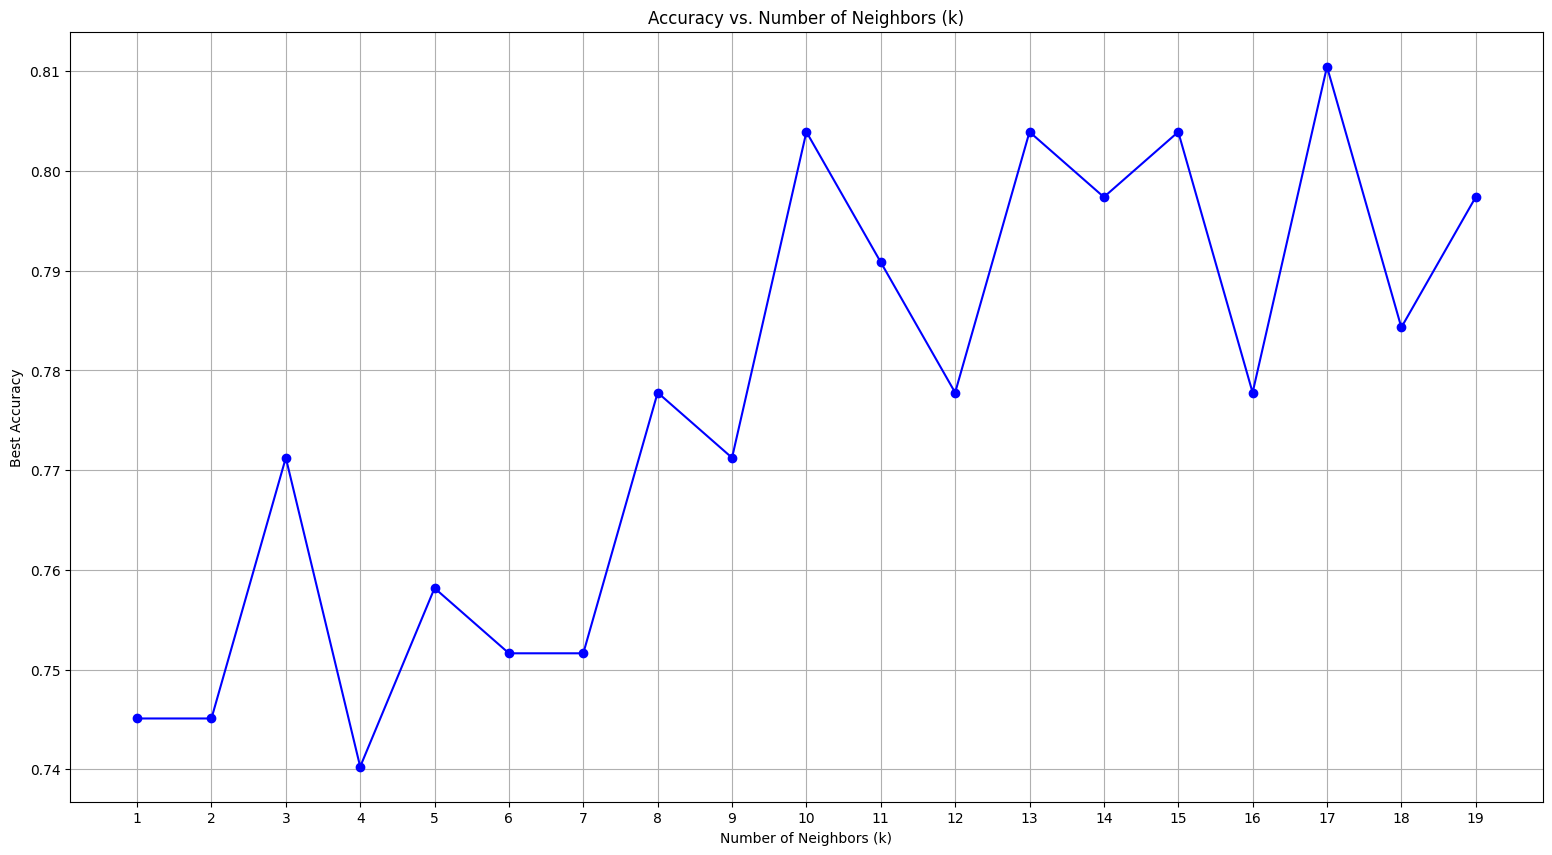

In [88]:
# Plot the accuracy scores
plt.figure(figsize=(19, 10))
plt.plot(k_values, best_accuracy_of_each_k, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Best Accuracy')
plt.grid(True)
plt.xticks(range(1, 20))
plt.show()

In [89]:
# Find the best k with the highest accuracy
best_k = k_values[best_accuracy_of_each_k.index(max(best_accuracy_of_each_k))]
print("Best k:", best_k)
print("Accuracy:", max(best_accuracy_of_each_k))

Best k: 17
Accuracy: 0.8104575163398693
